In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



In [53]:
# Load the dataset
file_path = '/content/Train.csv'
df = pd.read_csv(file_path)

In [54]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [55]:
df.shape

(8068, 11)

In [56]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [58]:
# Drop irrelevant columns (ID, Segmentation)
df_cluster = df.drop(columns=['ID', 'Segmentation'])

In [59]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [60]:
# Impute missing values in numerical features
numeric_features = df_cluster.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='mean')
df_cluster[numeric_features] = imputer_num.fit_transform(df_cluster[numeric_features])

In [61]:
# Impute missing values in categorical features
categorical_features = df_cluster.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_cluster[categorical_features] = imputer_cat.fit_transform(df_cluster[categorical_features])

In [62]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_cluster[categorical_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

In [65]:
encoded_cats_df.head()

,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
df_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22.0,No,Healthcare,1.000000,Low,4.0,Cat_4
1,Female,Yes,38.0,Yes,Engineer,2.641663,Average,3.0,Cat_4
2,Female,Yes,67.0,Yes,Engineer,1.000000,Low,1.0,Cat_6
3,Male,Yes,67.0,Yes,Lawyer,0.000000,High,2.0,Cat_6
4,Female,Yes,40.0,Yes,Entertainment,2.641663,High,6.0,Cat_6


In [64]:
print("Null values in each column:")
print(df_cluster.isnull().sum())

Null values in each column:
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [72]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       8068 non-null   float64
 1   Work_Experience           8068 non-null   float64
 2   Family_Size               8068 non-null   float64
 3   Gender_Male               8068 non-null   float64
 4   Ever_Married_Yes          8068 non-null   float64
 5   Graduated_Yes             8068 non-null   float64
 6   Profession_Doctor         8068 non-null   float64
 7   Profession_Engineer       8068 non-null   float64
 8   Profession_Entertainment  8068 non-null   float64
 9   Profession_Executive      8068 non-null   float64
 10  Profession_Healthcare     8068 non-null   float64
 11  Profession_Homemaker      8068 non-null   float64
 12  Profession_Lawyer         8068 non-null   float64
 13  Profession_Marketing      8068 non-null   float64
 14  Spending

In [66]:
# Concatenate encoded categorical features with the original data
df_cluster = pd.concat([df_cluster[numeric_features], encoded_cats_df], axis=1)

In [68]:
#  Standardize numerical features
scaler = StandardScaler()
df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

In [69]:
# Determine the optimal number of clusters using the Elbow Method
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    wss.append(kmeans.inertia_)

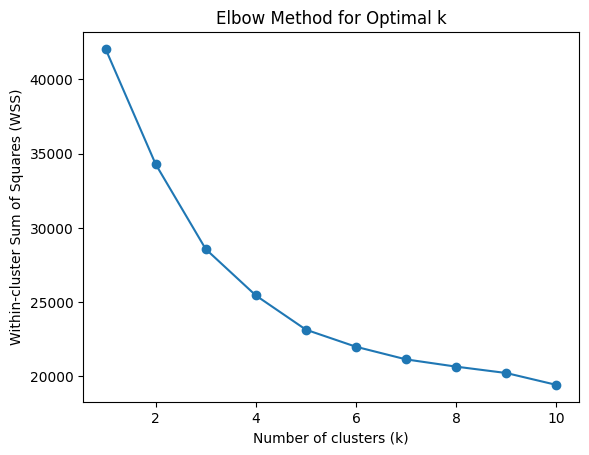

In [70]:
# Plot the Elbow Method
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [88]:
# Apply K-means
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_cluster)

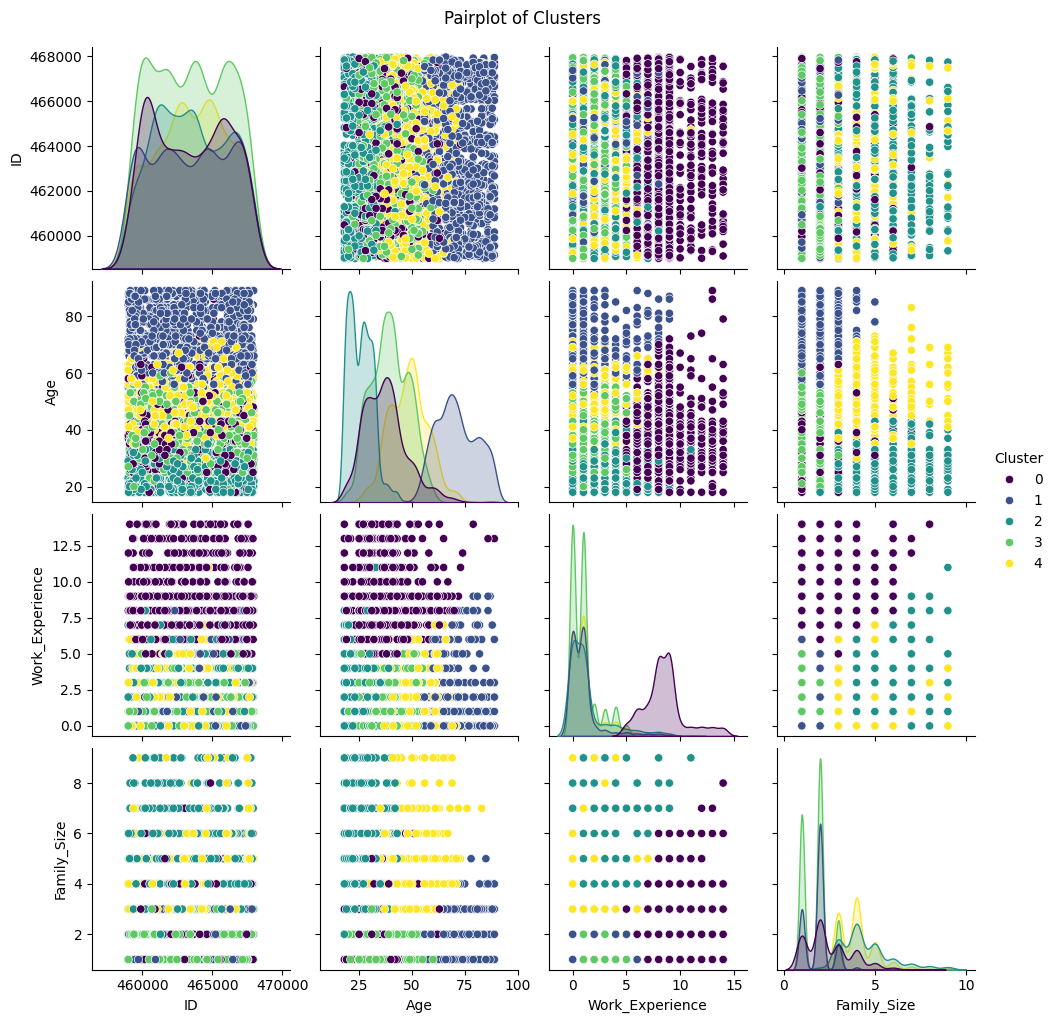

In [89]:
# Visualize clusters using pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle("Pairplot of Clusters", y=1.02)
plt.show()

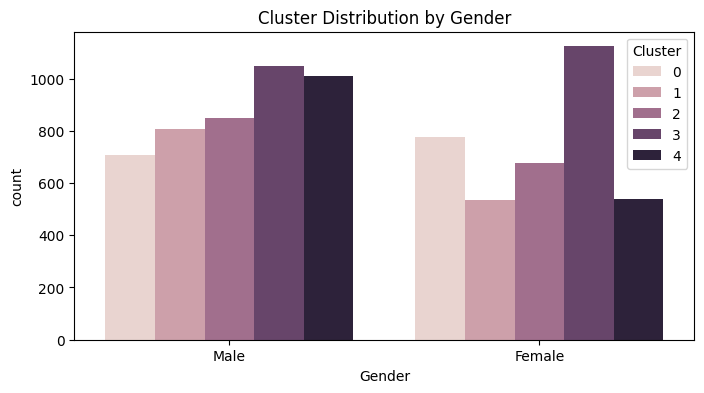

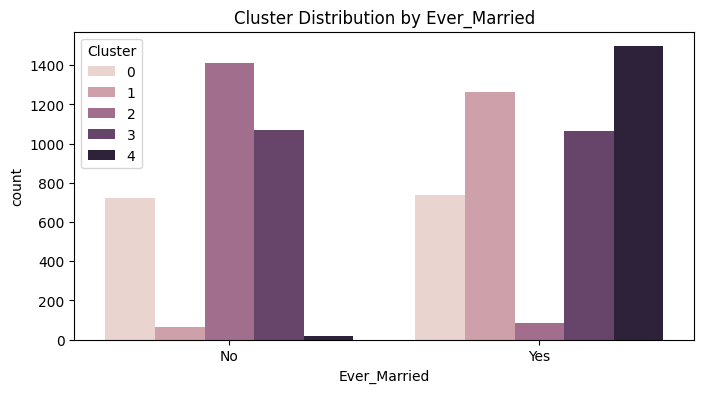

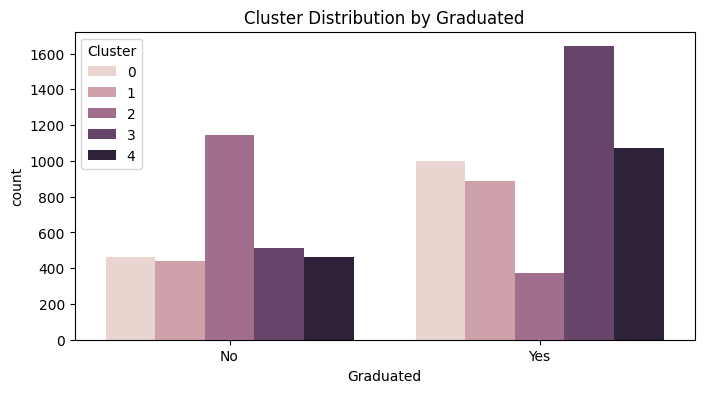

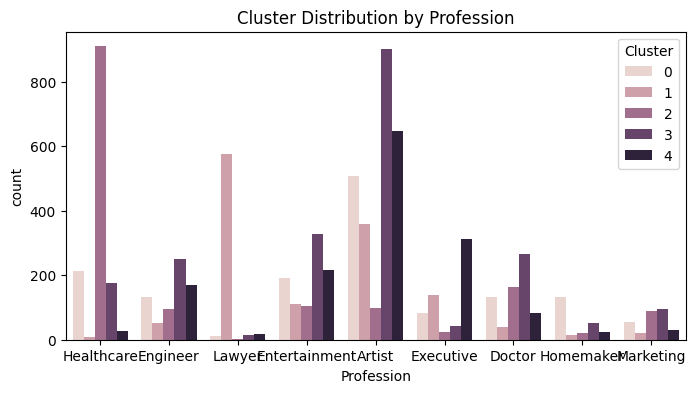

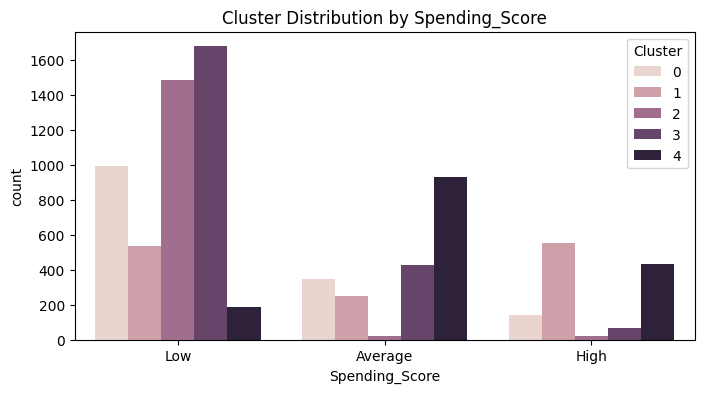

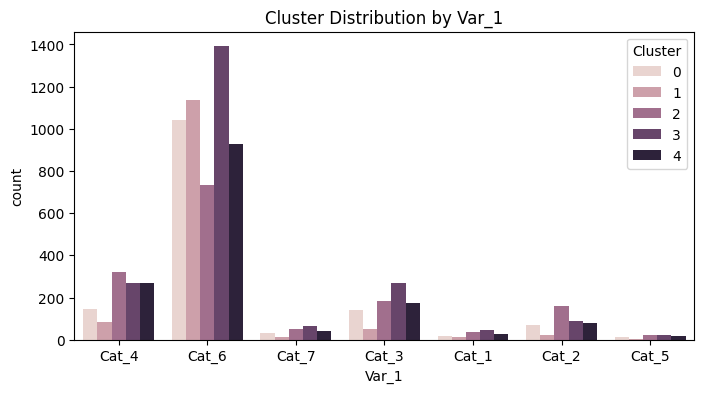

In [90]:
# Analyze clusters with bar plots for categorical features
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Cluster')
    plt.title(f'Cluster Distribution by {feature}')
    plt.show()

In [91]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df_cluster, df['Cluster'])
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}')

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_cluster, df['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.2f}')

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(df_cluster, df['Cluster'])
print(f'Calinski-Harabasz Index: {ch_index:.2f}')


Silhouette Score for k=5: 0.18
Davies-Bouldin Index: 1.64
Calinski-Harabasz Index: 1645.84
